In [3]:
import pandas as pd

regions = pd.read_csv('regions.csv', delimiter='\t')
print(regions)

ppl = pd.read_csv('population.csv', delimiter='\t')
print(ppl)

    code                           name
0      0                        Ukraine
1      1  Autonomous Republic of Crimea
2      5               Vinnytsia Oblast
3      7                   Volyn Oblast
4     12          Dnipropetrovsk Oblast
5     14                 Donetsk Oblast
6     18                Zhytomyr Oblast
7     21             Zakarpattia Oblast
8     23              Zaporizhia Oblast
9     26         Ivano-Frankivsk Oblast
10    32                    Kiev Oblast
11    35              Kirovohrad Oblast
12    44                 Luhansk Oblast
13    46                    Lviv Oblast
14    48                Mykolaiv Oblast
15    51                  Odessa Oblast
16    53                 Poltava Oblast
17    56                   Rivne Oblast
18    59                    Sumy Oblast
19    61                Ternopil Oblast
20    63                 Kharkiv Oblast
21    65                 Kherson Oblast
22    68            Khmelnytskyi Oblast
23    71                Cherkasy Oblast


In [4]:
# Merge the dataframes on the region in ppl and code in regions
data = pd.merge(ppl, regions, left_on='region', right_on='code')
data = data.drop('code', axis=1)
data

# Save the result to a new file
data.to_csv('merged_data.csv', index=False)

In [5]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data from the new file to verify that it worked
new_data = pd.read_csv('merged_data.csv')
print(new_data)

data['gender'] = (data["gender"] == 'f').astype(int)

# Need to fill missing values where value is 'unknown'
#imputer = SimpleImputer(strategy='mean')
#data = data.fillna('unknown')
#data = imputer.fit_transform(data)
#data = pd.DataFrame(data, columns=data.columns)

data.head()


        region  year gender      age     count                name
0            0  1989      m    total  23745108             Ukraine
1            0  1989      m        0    370680             Ukraine
2            0  1989      m        1    379109             Ukraine
3            0  1989      m        2    397772             Ukraine
4            0  1989      m        3    387079             Ukraine
...        ...   ...    ...      ...       ...                 ...
176537      85  2014      f       97         6  City of Sevastopol
176538      85  2014      f       98         4  City of Sevastopol
176539      85  2014      f       99         1  City of Sevastopol
176540      85  2014      f      100        10  City of Sevastopol
176541      85  2014      f  unknown         0  City of Sevastopol

[176542 rows x 6 columns]


region  year  gender    age     count     name
0       0  1989       0  total  23745108  Ukraine
1       0  1989       0      0    370680  Ukraine
2       0  1989       0      1    379109  Ukraine
3       0  1989       0      2    397772  Ukraine
4       0  1989       0      3    387079  Ukraine

## Population Pyramids

gender  age       0       1
0         0  370680  354974
1         1  379109  362729
2        10  365252  353444
3       100     351    2478
4        11  358882  348483
..      ...     ...     ...
96       95    1131    4689
97       96     960    4025
98       97     542    2414
99       98     493    3005
100      99     284    1835

[101 rows x 3 columns]
     age    male  female
0      0  370680  354974
1      1  379109  362729
2     10  365252  353444
3    100     351    2478
4     11  358882  348483
..   ...     ...     ...
96    95    1131    4689
97    96     960    4025
98    97     542    2414
99    98     493    3005
100   99     284    1835

[101 rows x 3 columns]


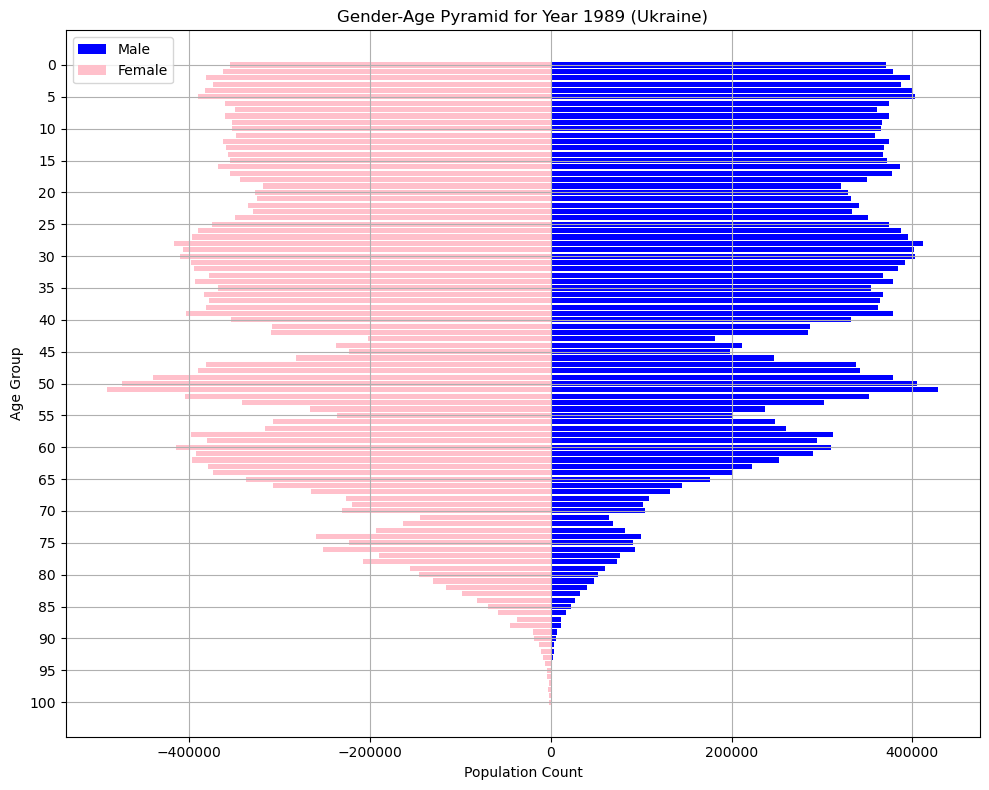

In [36]:
year = 1989

df_year = data[(data['year'] == 1989) & (data['name'] == 'Ukraine')]
df_year = df_year[(df_year['age'] != 'total') & (df_year['age'] != 'unknown')]
agg_df = df_year.groupby(['age', 'gender'])['count'].sum().reset_index()

agg_df

pivot_df = agg_df.pivot(index='age', columns='gender', values='count').reset_index()

print(pivot_df)

pivot_df.columns = ['age', 'male', 'female']

pivot_df['male'] = pivot_df['male'].fillna(0)
pivot_df['female'] = pivot_df['female'].fillna(0)

print(pivot_df)

pivot_df['age_sort'] = pivot_df['age'].astype(int)
pivot_df = pivot_df.sort_values(by='age_sort').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(pivot_df['age'], pivot_df['male'], color='blue', label='Male')
ax.barh(pivot_df['age'], -pivot_df['female'], color='pink', label='Female')

# Customize plot appearance
ax.set_xlabel('Population Count')
ax.set_ylabel('Age Group')
ax.set_title('Gender-Age Pyramid for Year 1989 (Ukraine)')
ax.legend()
ax.grid(True)

# Invert y-axis to display age groups from bottom to top
ax.invert_yaxis()
interval = 5  # Change this to the desired interval

ax.set_yticks(pivot_df.index[::interval])
ax.set_yticklabels(pivot_df['age'][::interval])

plt.tight_layout()
plt.show()


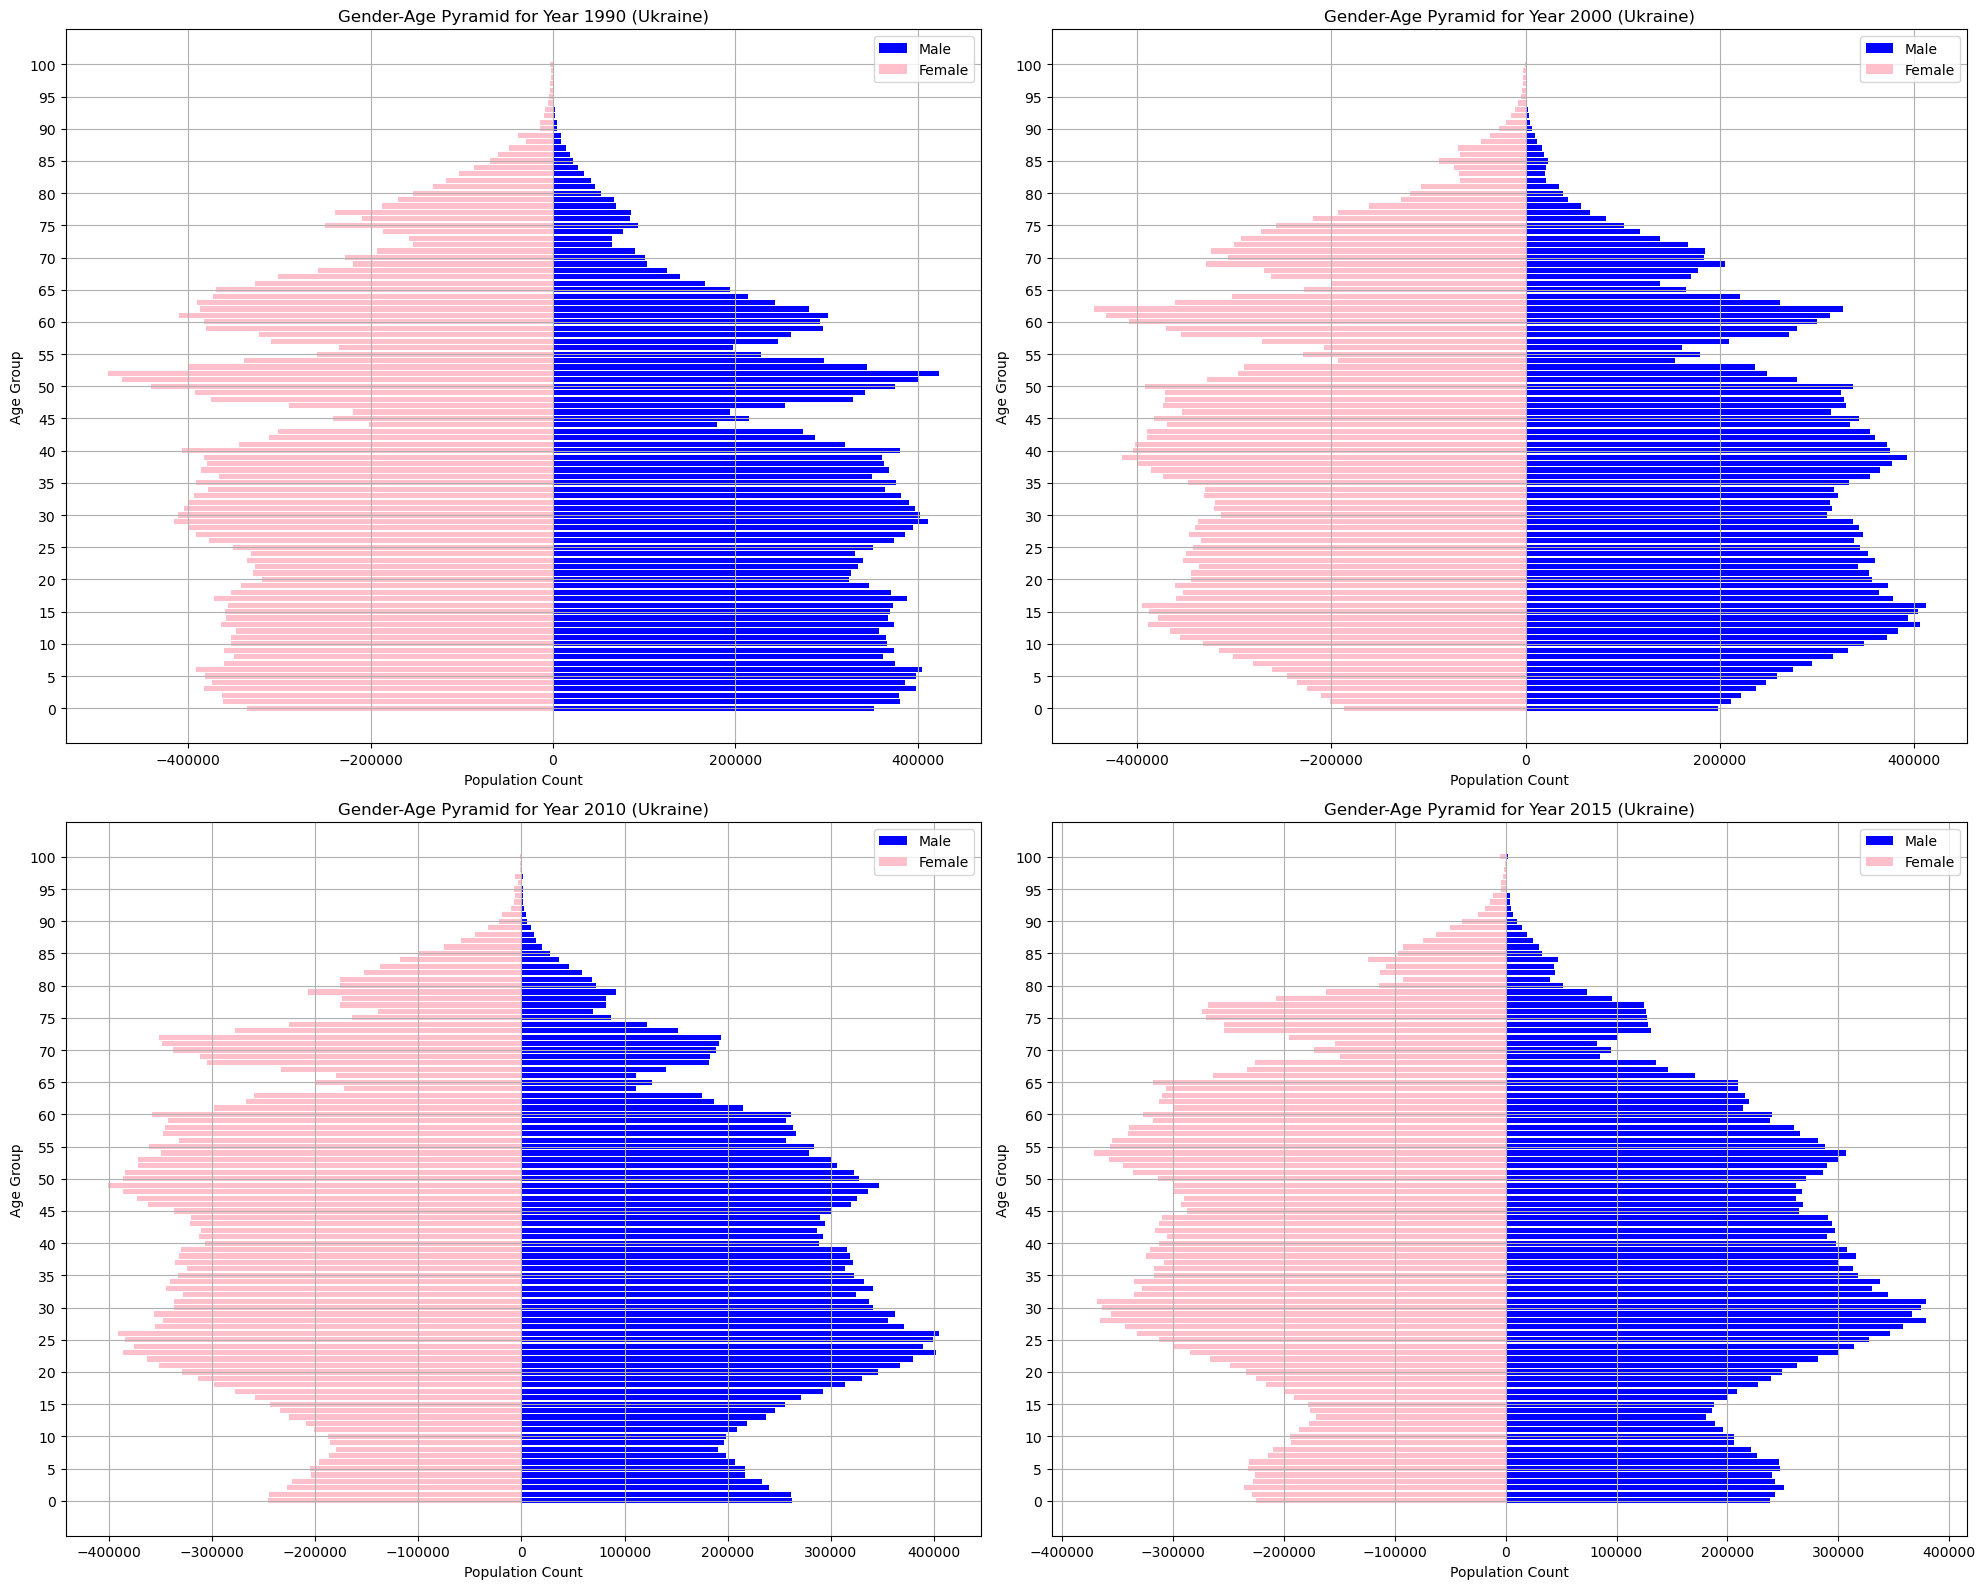

In [38]:
def create_population_pyramid(data, year, ax, interval=5):
    # Filter data for the specific year and name Ukraine
    df_year = data[(data['year'] == year) & (data['name'] == 'Ukraine')]
    df_year = df_year[(df_year['age'] != 'total') & (df_year['age'] != 'unknown')]

    # Group by age and gender, then sum the counts
    agg_df = df_year.groupby(['age', 'gender'])['count'].sum().reset_index()

    # Pivot the DataFrame to get 'age' as index and 'male' and 'female' as columns
    pivot_df = agg_df.pivot(index='age', columns='gender', values='count').reset_index()

    # Rename columns for clarity
    pivot_df.columns = ['age', 'male', 'female']

    # Handle missing values by filling with 0 (if any age group has missing gender data)
    pivot_df['male'] = pivot_df['male'].fillna(0)
    pivot_df['female'] = pivot_df['female'].fillna(0)

    # Extract numerical part of age for sorting
    pivot_df['age_sort'] = pivot_df['age'].astype(int)

    # Sort by age
    pivot_df = pivot_df.sort_values(by='age_sort').reset_index(drop=True)

    # Plotting
    ax.barh(pivot_df['age'], pivot_df['male'], color='blue', label='Male')
    ax.barh(pivot_df['age'], -pivot_df['female'], color='pink', label='Female')

    # Customize plot appearance
    ax.set_xlabel('Population Count')
    ax.set_ylabel('Age Group')
    ax.set_title(f'Gender-Age Pyramid for Year {year} (Ukraine)')
    ax.legend()
    ax.grid(True)

    # Invert y-axis to display age groups from bottom to top
    #ax.invert_yaxis()

    # Set y-ticks at specific intervals based on index positions
    ax.set_yticks(pivot_df.index[::interval])
    ax.set_yticklabels(pivot_df['age'][::interval])

# Define the years you want to compare
years = [1990, 2000, 2010, 2015]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

# Plot each year's population pyramid
for ax, year in zip(axes, years):
    create_population_pyramid(data, year, ax)

plt.tight_layout()
plt.show()

In [50]:
# Plot total population per regio

total_population_ukraine = data[(data['name'] == 'Ukraine') & (data['age'] == 'total')]

print(total_population_ukraine)

      region  year  gender    age     count     name
0          0  1989       0  total  23745108  Ukraine
103        0  1989       1  total  27706926  Ukraine
206        0  1990       0  total  23826196  Ukraine
309        0  1990       1  total  27730317  Ukraine
412        0  1991       0  total  23886551  Ukraine
...      ...   ...     ...    ...       ...      ...
5871       0  2017       1  total  22770325  Ukraine
5974       0  2018       0  total  19558180  Ukraine
6077       0  2018       1  total  22658586  Ukraine
6180       0  2019       0  total  19455272  Ukraine
6283       0  2019       1  total  22528292  Ukraine

[62 rows x 6 columns]


## 1. Line Chart


/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/3275977798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')
/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/3275977798.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


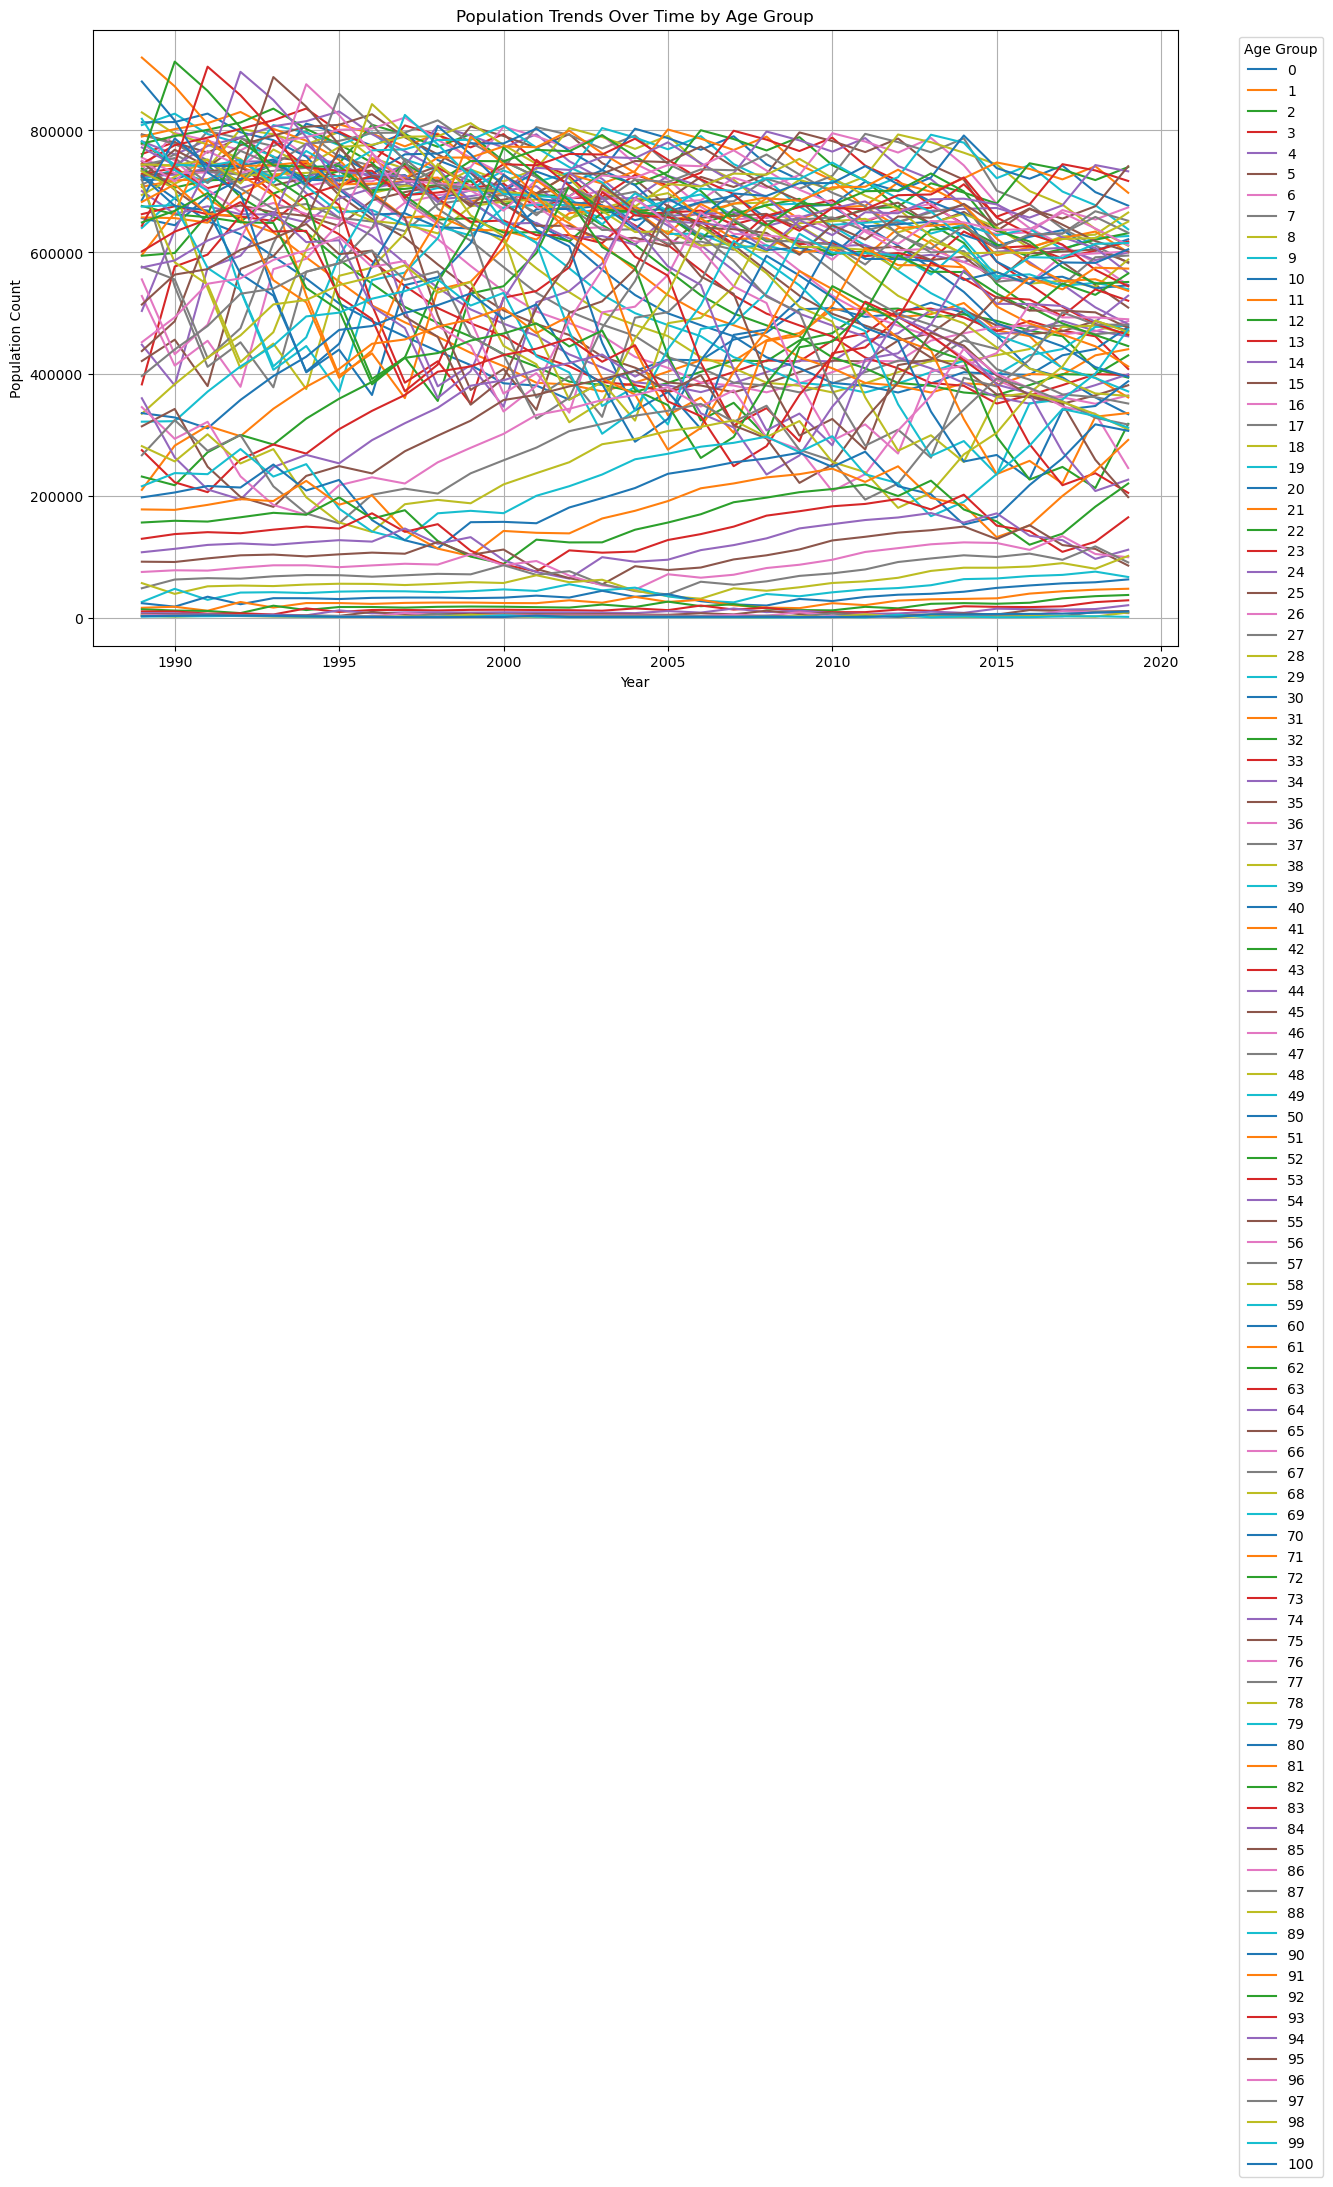

In [39]:
# Filter the data for 'Ukraine' and exclude 'total' and 'unknown' ages
df = data[(data['name'] == 'Ukraine') & (data['age'] != 'total') & (data['age'] != 'unknown')]

# Convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Group by year and age and sum the counts
df_grouped = df.groupby(['year', 'age'])['count'].sum().reset_index()

# Pivot the DataFrame to get 'year' as index and 'age' as columns
pivot_df = df_grouped.pivot(index='year', columns='age', values='count')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot(ax=ax, legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('Population Count')
ax.set_title('Population Trends Over Time by Age Group')
ax.grid(True)

# Add legend outside of the plot
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/850429486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')
/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/850429486.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


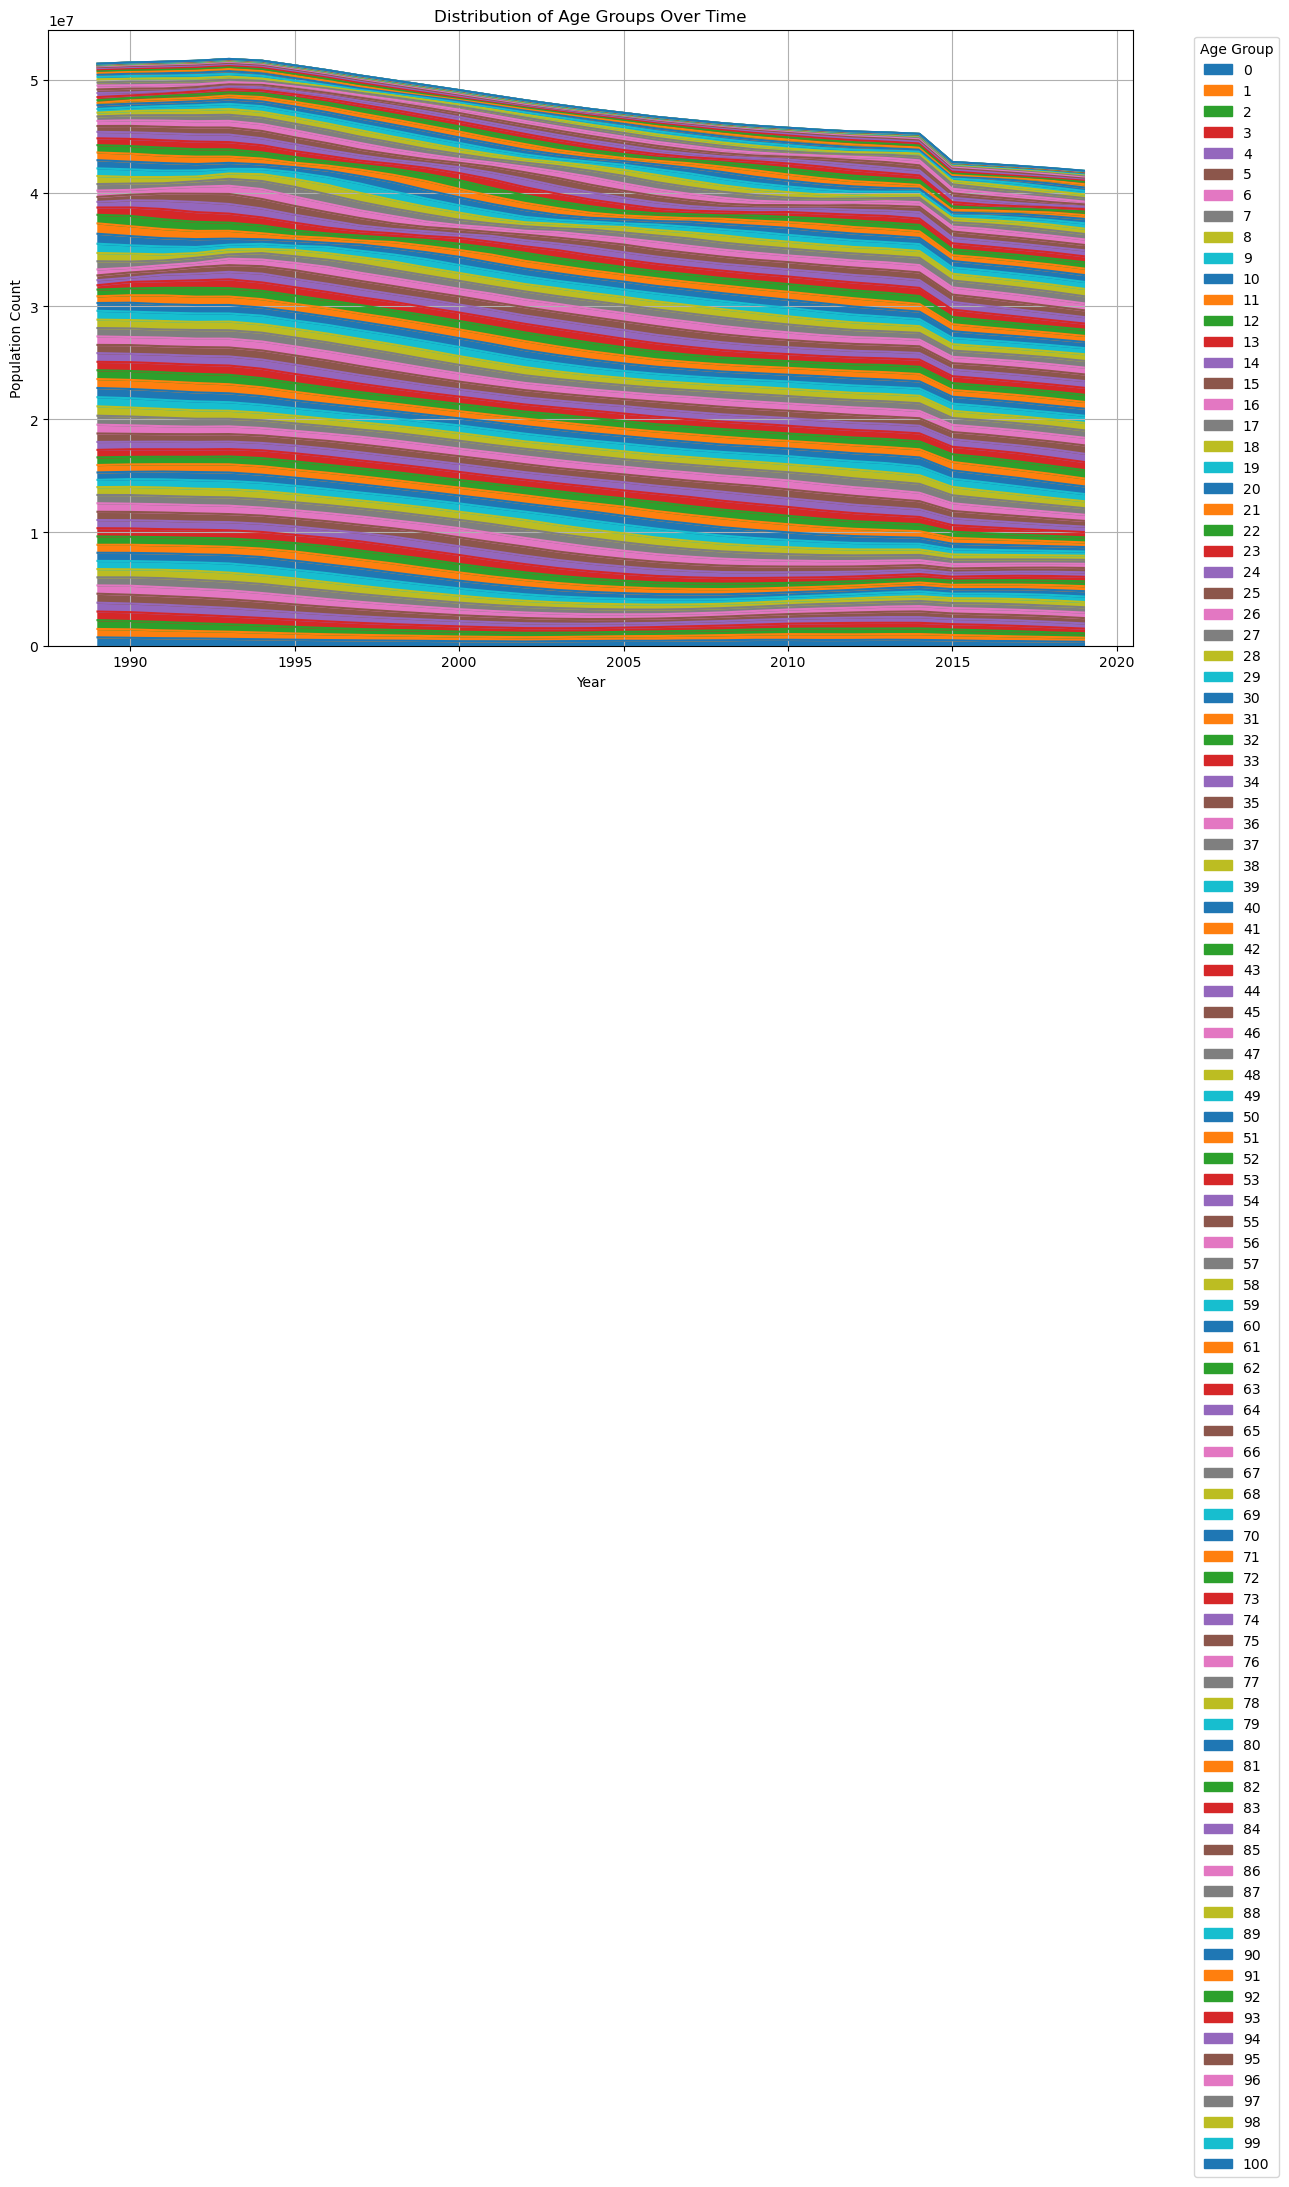

In [41]:
# Filter the data for 'Ukraine' and exclude 'total' and 'unknown' ages
df = data[(data['name'] == 'Ukraine') & (data['age'] != 'total') & (data['age'] != 'unknown')]

# Convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Group by year and age and sum the counts
df_grouped = df.groupby(['year', 'age'])['count'].sum().reset_index()

# Pivot the DataFrame to get 'year' as index and 'age' as columns
pivot_df = df_grouped.pivot(index='year', columns='age', values='count')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot.area(ax=ax, legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('Population Count')
ax.set_title('Distribution of Age Groups Over Time')
ax.grid(True)

# Add legend outside of the plot
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/1349413814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')


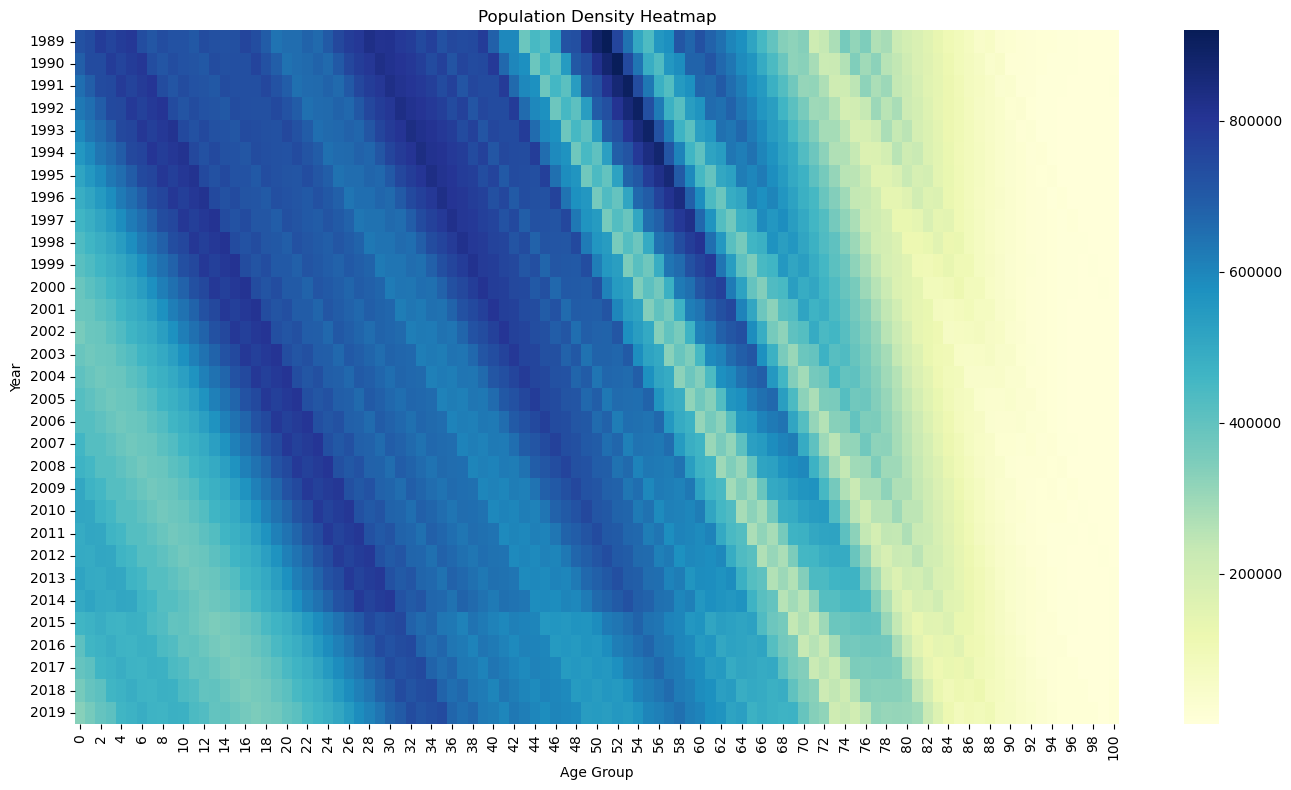

In [44]:
import seaborn as sns

# Filter the data for 'Ukraine' and exclude 'total' and 'unknown' ages
df = data[(data['name'] == 'Ukraine') & (data['age'] != 'total') & (data['age'] != 'unknown')]

# Convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Group by year and age and sum the counts
df_grouped = df.groupby(['year', 'age'])['count'].sum().reset_index()

# Pivot the DataFrame to get 'year' as index and 'age' as columns
pivot_df = df_grouped.pivot(index='year', columns='age', values='count')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Year')
ax.set_title('Population Density Heatmap')

plt.tight_layout()
plt.show()


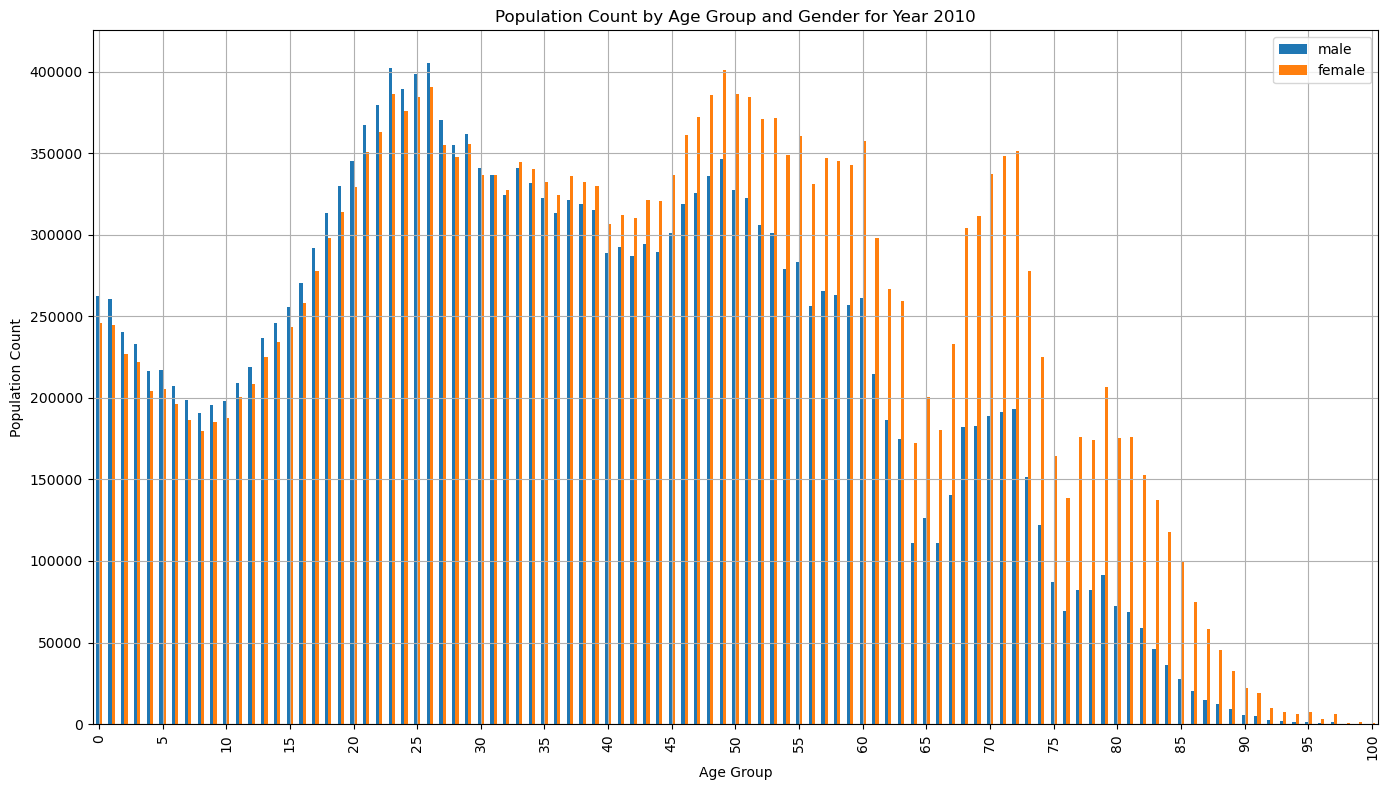

In [49]:
# Filter the data for a specific year and 'Ukraine'
year = 2010
df_year = data[(data['year'] == year) & (data['name'] == 'Ukraine')]
df_year = df_year[(df_year['age'] != 'total') & (df_year['age'] != 'unknown')]

# Group by age and gender, then sum the counts
agg_df = df_year.groupby(['age', 'gender'])['count'].sum().reset_index()

# Pivot the DataFrame to get 'age' as index and 'male' and 'female' as columns
pivot_df = agg_df.pivot(index='age', columns='gender', values='count').reset_index()

# Rename columns for clarity
pivot_df.columns = ['age', 'male', 'female']

# Handle missing values by filling with 0 (if any age group has missing gender data)
pivot_df['male'] = pivot_df['male'].fillna(0)
pivot_df['female'] = pivot_df['female'].fillna(0)

# Extract numerical part of age for sorting
pivot_df['age_sort'] = pivot_df['age'].astype(int)
pivot_df = pivot_df.sort_values(by='age_sort').reset_index(drop=True)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot.bar(x='age', y=['male', 'female'], ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Population Count')

ax.set_xticks(pivot_df.index[::5])
ax.set_xticklabels(pivot_df['age'][::5])
ax.set_title(f'Population Count by Age Group and Gender for Year {year}')
ax.grid(True)

plt.tight_layout()
plt.show()

/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/299921647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')


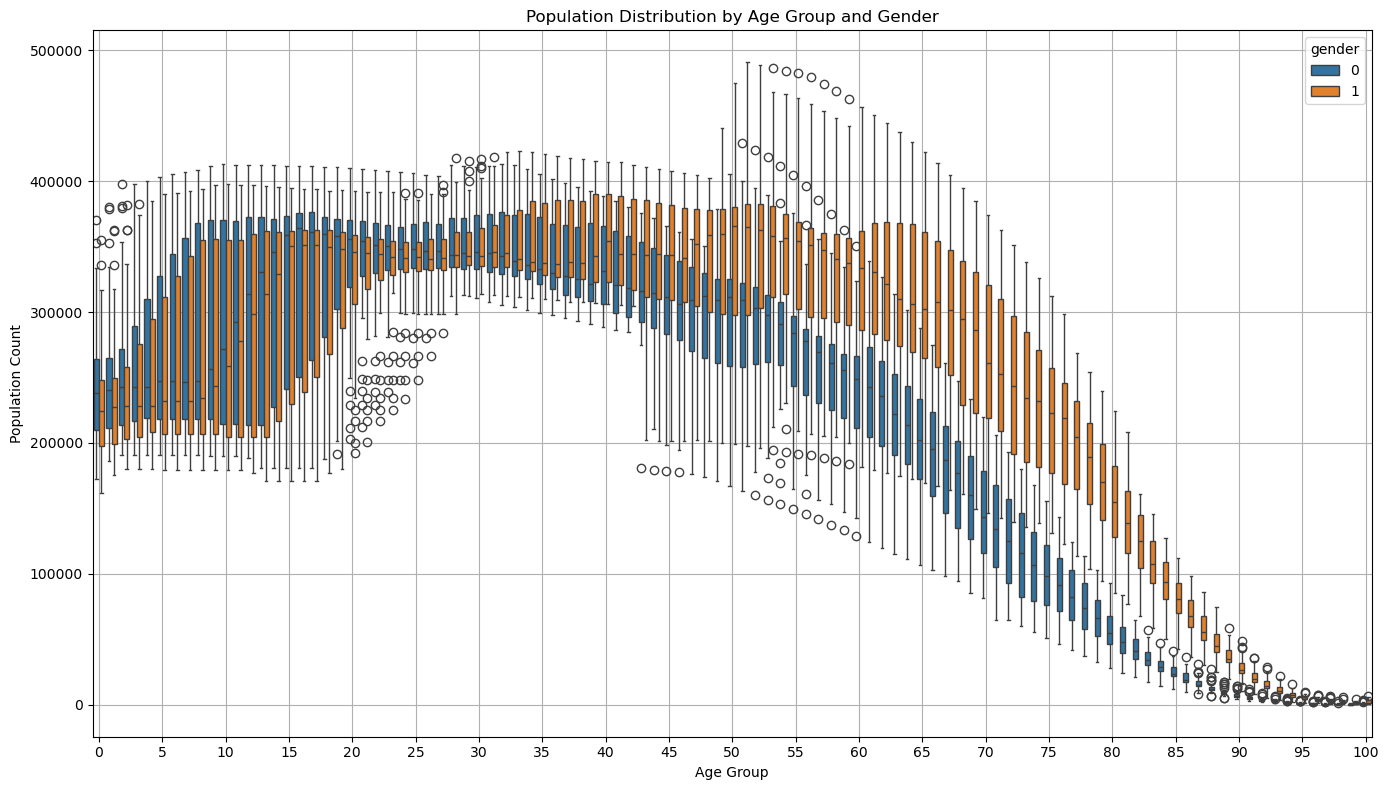

In [51]:
# Filter the data for 'Ukraine' and exclude 'total' and 'unknown' ages
df = data[(data['name'] == 'Ukraine') & (data['age'] != 'total') & (data['age'] != 'unknown')]

# Convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='age', y='count', hue='gender', data=df)
ax.set_xlabel('Age Group')
ax.set_ylabel('Population Count')
ax.set_xticks(pivot_df.index[::5])
ax.set_xticklabels(pivot_df['age'][::5])
ax.set_title('Population Distribution by Age Group and Gender')
ax.grid(True)

plt.tight_layout()
plt.show()

## Comparing of Ivano-Frankivsk Oblast and Zaporizhia Oblast

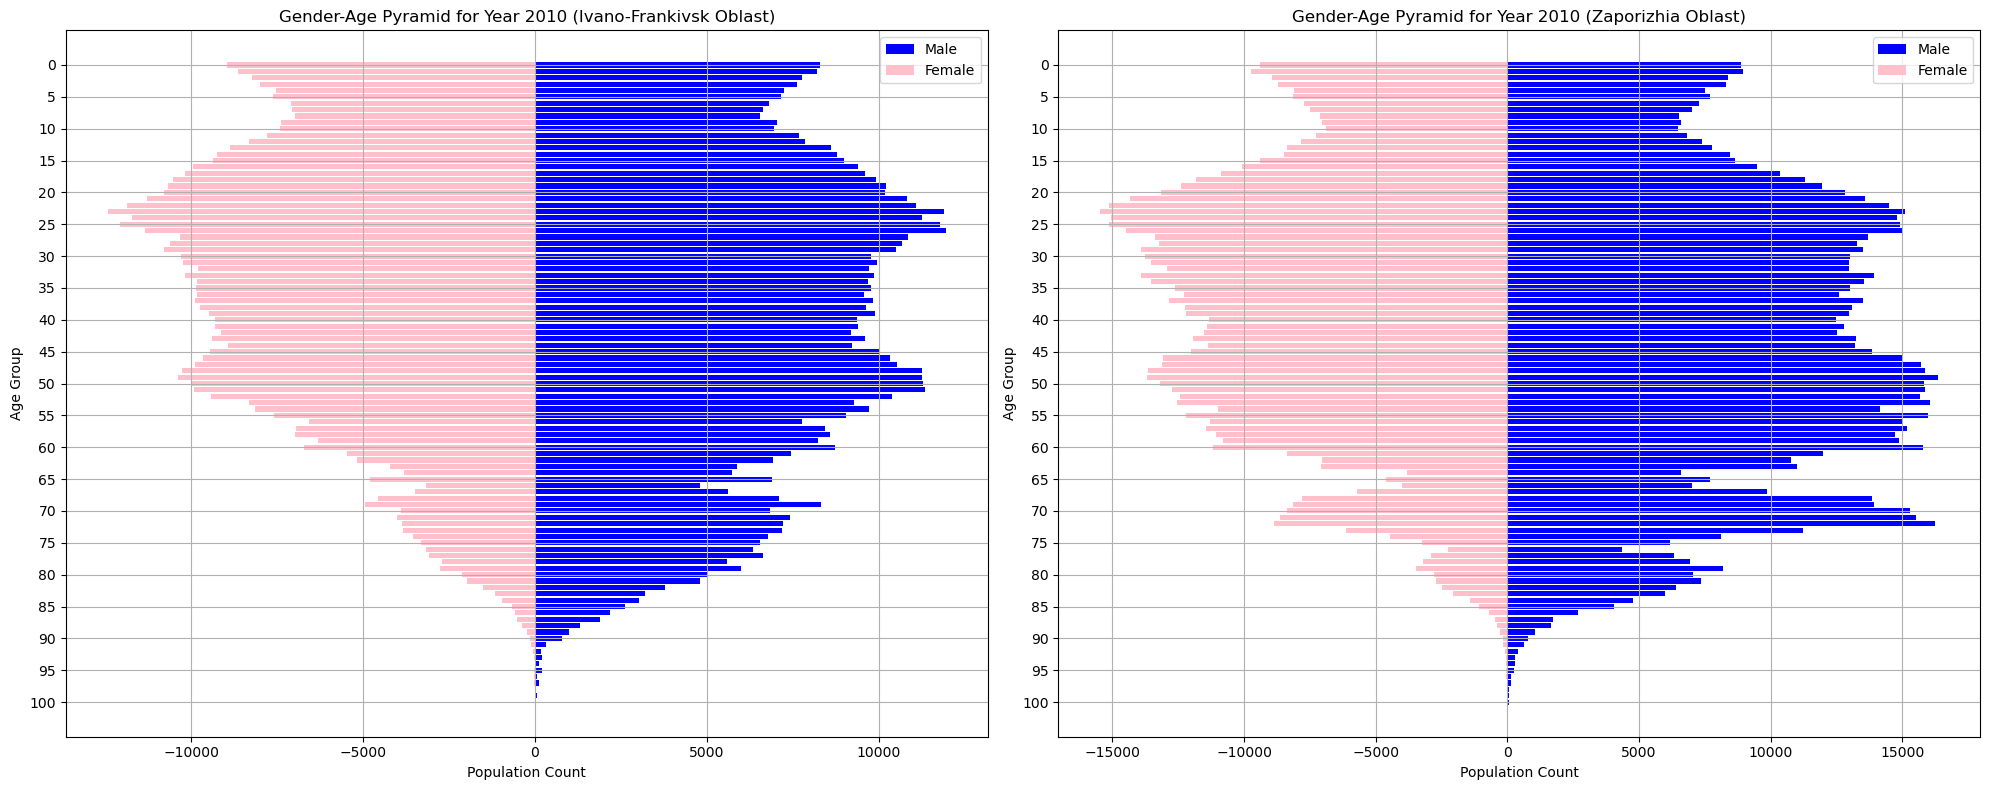

/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/3846638675.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')
/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/3846638675.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')
/var/folders/7q/tklnpyzn627dh58yxzs3qs140000gn/T/ipykernel_1666/3846638675.py:83: UserWarning: Tight layout not applied. The bottom and top margins 

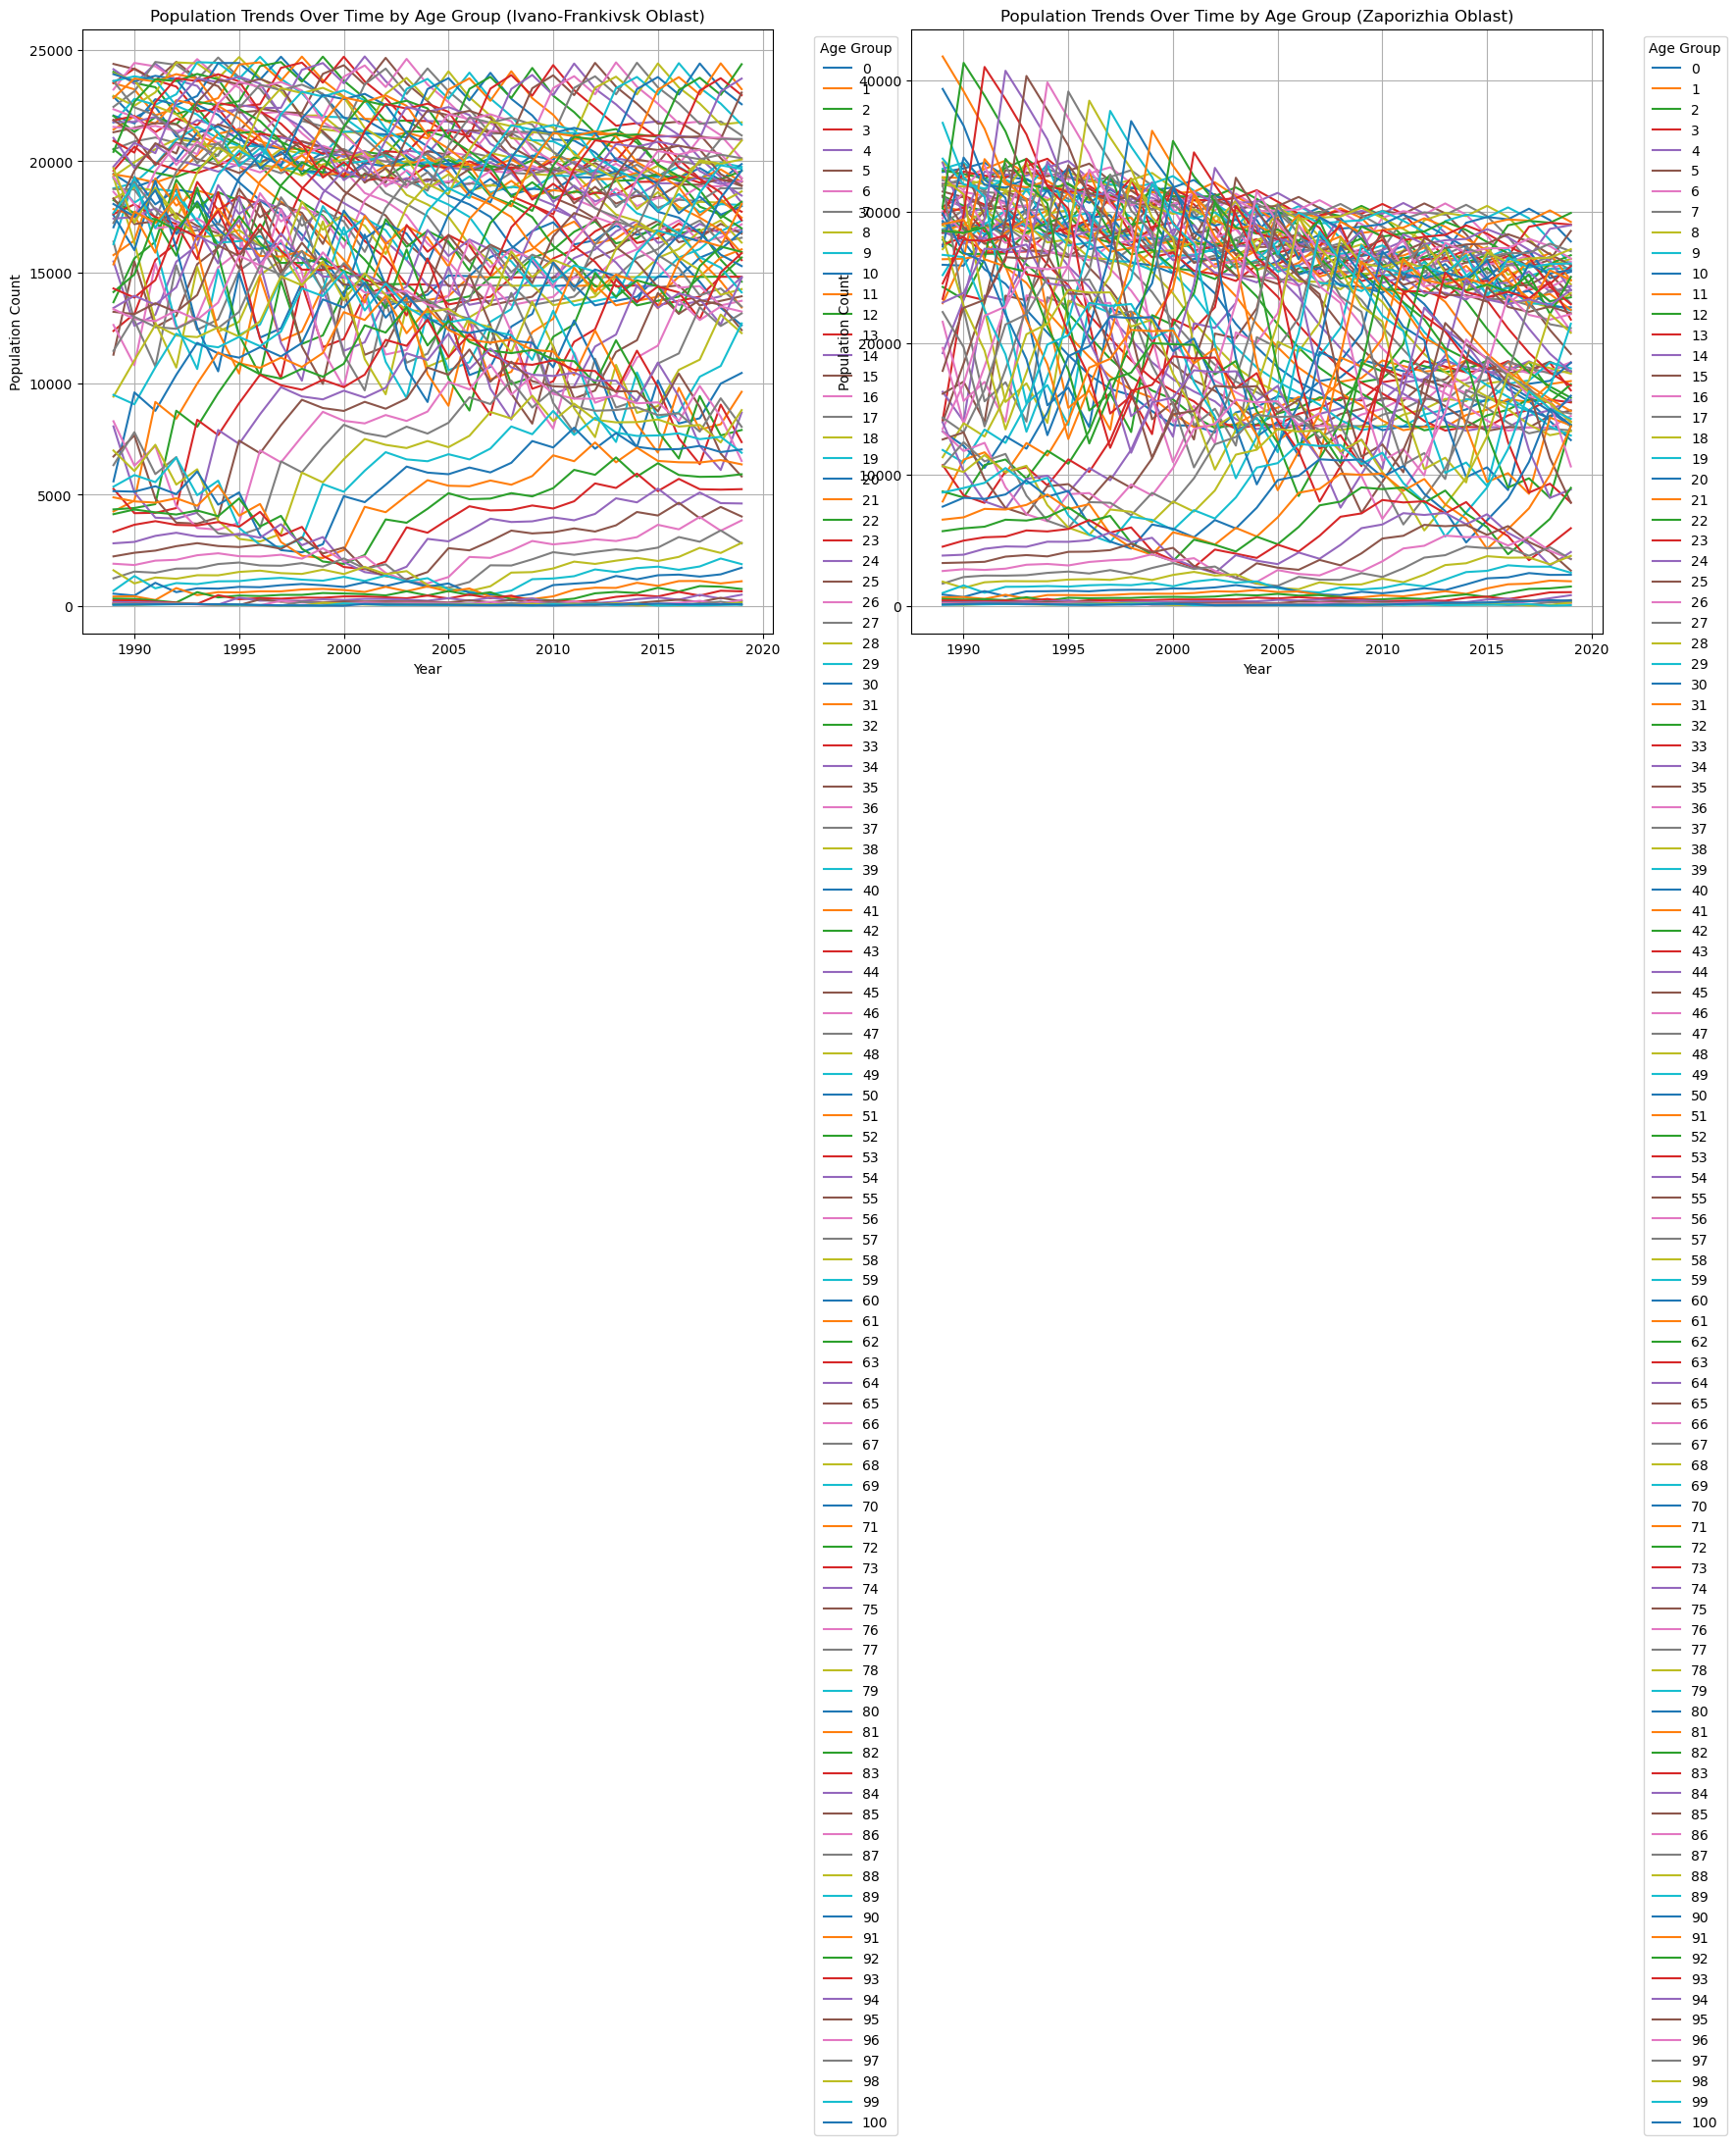

In [52]:
def create_population_pyramid(data, year, region, ax, interval=5):
    # Filter data for the specific year and region
    df_year = data[(data['year'] == year) & (data['name'] == region)]
    df_year = df_year[(df_year['age'] != 'total') & (df_year['age'] != 'unknown')]

    # Group by age and gender, then sum the counts
    agg_df = df_year.groupby(['age', 'gender'])['count'].sum().reset_index()

    # Pivot the DataFrame to get 'age' as index and 'male' and 'female' as columns
    pivot_df = agg_df.pivot(index='age', columns='gender', values='count').reset_index()

    # Rename columns for clarity
    pivot_df.columns = ['age', 'female', 'male']

    # Handle missing values by filling with 0 (if any age group has missing gender data)
    pivot_df['male'] = pivot_df['male'].fillna(0)
    pivot_df['female'] = pivot_df['female'].fillna(0)

    # Extract numerical part of age for sorting
    pivot_df['age_sort'] = pivot_df['age'].astype(int)

    # Sort by age
    pivot_df = pivot_df.sort_values(by='age_sort').reset_index(drop=True)

    # Plotting
    ax.barh(pivot_df['age'], pivot_df['male'], color='blue', label='Male')
    ax.barh(pivot_df['age'], -pivot_df['female'], color='pink', label='Female')

    # Customize plot appearance
    ax.set_xlabel('Population Count')
    ax.set_ylabel('Age Group')
    ax.set_title(f'Gender-Age Pyramid for Year {year} ({region})')
    ax.legend()
    ax.grid(True)

    # Invert y-axis to display age groups from bottom to top
    ax.invert_yaxis()

    # Set y-ticks at specific intervals based on index positions
    ax.set_yticks(pivot_df.index[::interval])
    ax.set_yticklabels(pivot_df['age'][::interval])

def create_line_chart(data, region, ax):
    # Filter the data for the region and exclude 'total' and 'unknown' ages
    df = data[(data['name'] == region) & (data['age'] != 'total') & (data['age'] != 'unknown')]

    # Convert age to numeric
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Group by year and age and sum the counts
    df_grouped = df.groupby(['year', 'age'])['count'].sum().reset_index()

    # Pivot the DataFrame to get 'year' as index and 'age' as columns
    pivot_df = df_grouped.pivot(index='year', columns='age', values='count')

    # Plotting
    pivot_df.plot(ax=ax, legend=False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Population Count')
    ax.set_title(f'Population Trends Over Time by Age Group ({region})')
    ax.grid(True)

    # Add legend outside of the plot
    ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Define the years and regions you want to compare
year = 2010
regions = ['Ivano-Frankivsk Oblast', 'Zaporizhia Oblast']

# Create subplots for population pyramids
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for ax, region in zip(axes, regions):
    create_population_pyramid(data, year, region, ax)

plt.tight_layout()
plt.show()

# Create subplots for line charts
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
for ax, region in zip(axes, regions):
    create_line_chart(data, region, ax)

plt.tight_layout()
plt.show()

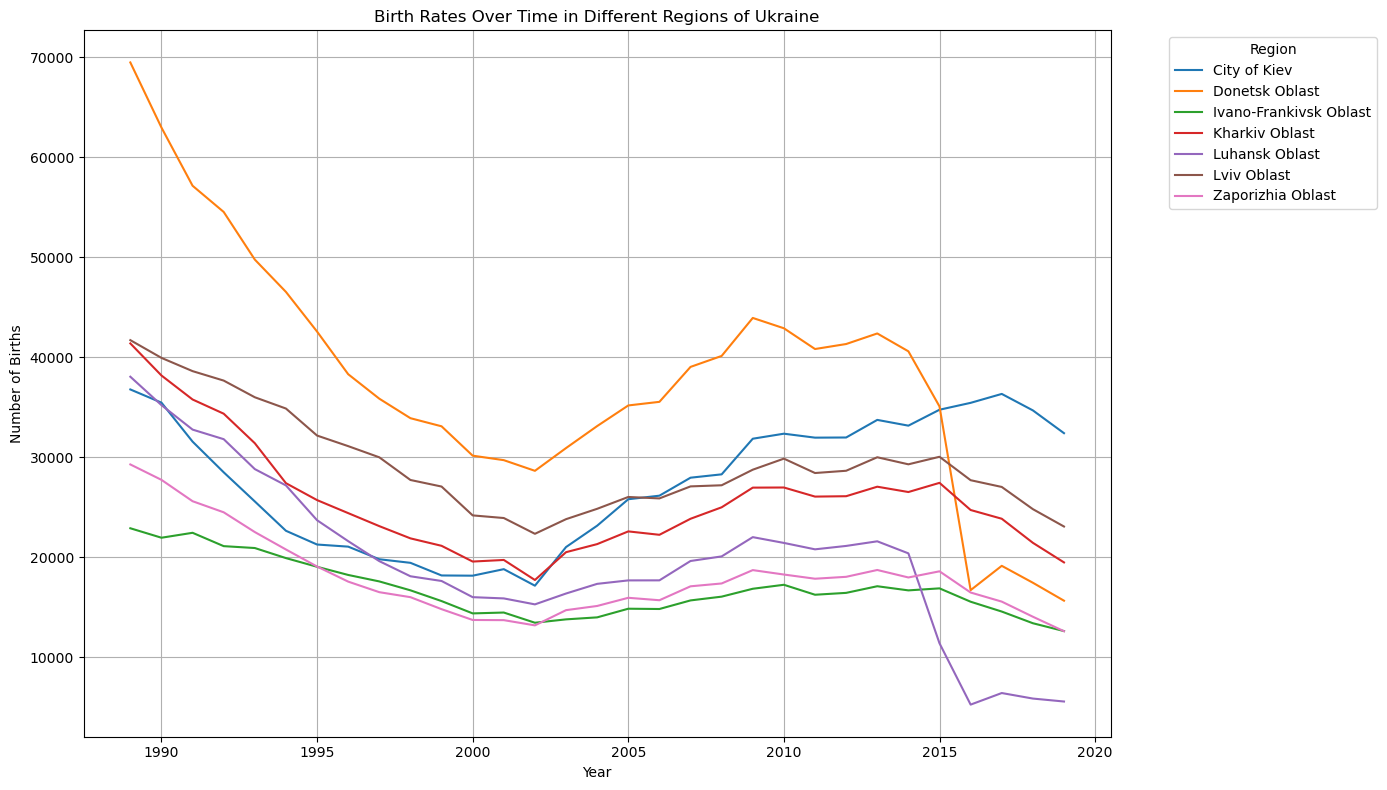

In [60]:
regions = ['Ivano-Frankivsk Oblast', 'Zaporizhia Oblast', 'Lviv Oblast', 'Kharkiv Oblast', 'City of Kiev', 'Donetsk Oblast', 'Luhansk Oblast']
df = data[(data['name'].isin(regions)) & (data['age'] == '0')]

# Group by year and region, then sum the counts
df_grouped = df.groupby(['year', 'name'])['count'].sum().reset_index()

# Pivot the DataFrame to get 'year' as index and regions as columns
pivot_df = df_grouped.pivot(index='year', columns='name', values='count')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
pivot_df.plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Births')
ax.set_title('Birth Rates Over Time in Different Regions of Ukraine')
ax.grid(True)

# Add legend outside of the plot
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Comparing Birth Rate Bar Charts

    region     count
0        0  14839004
1        1    556583
2        5    554190
3        7    428396
4       12   1063651
5       14   1182548
6       18    463916
7       21    529560
8       23    557862
9       26    521561
10      32    582108
11      35    338798
12      44    612363
13      46    909810
14      48    399420
15      51    817528
16      53    452704
17      56    499813
18      59    343854
19      61    383915
20      63    793929
21      65    386734
22      68    455036
23      71    402088
24      73    339443
25      74    324262
26      80    855444
27      85     83488


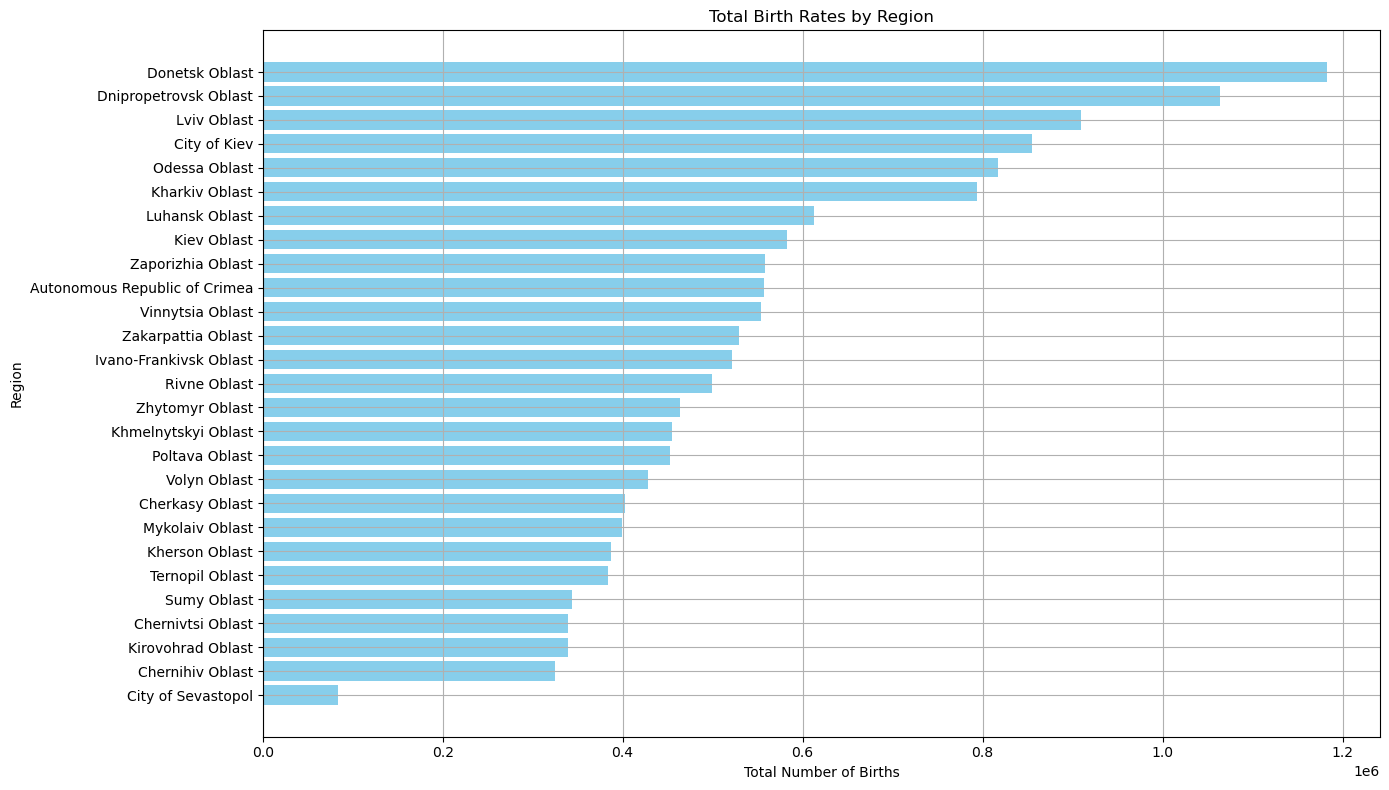

In [67]:
# Sample region names and codes
region_codes = {
    1: "Autonomous Republic of Crimea",
    5: "Vinnytsia Oblast",
    7: "Volyn Oblast",
    12: "Dnipropetrovsk Oblast",
    14: "Donetsk Oblast",
    18: "Zhytomyr Oblast",
    21: "Zakarpattia Oblast",
    23: "Zaporizhia Oblast",
    26: "Ivano-Frankivsk Oblast",
    32: "Kiev Oblast",
    35: "Kirovohrad Oblast",
    44: "Luhansk Oblast",
    46: "Lviv Oblast",
    48: "Mykolaiv Oblast",
    51: "Odessa Oblast",
    53: "Poltava Oblast",
    56: "Rivne Oblast",
    59: "Sumy Oblast",
    61: "Ternopil Oblast",
    63: "Kharkiv Oblast",
    65: "Kherson Oblast",
    68: "Khmelnytskyi Oblast",
    71: "Cherkasy Oblast",
    73: "Chernivtsi Oblast",
    74: "Chernihiv Oblast",
    80: "City of Kiev",
    85: "City of Sevastopol"
}

# Filter the data for births (age 0)
df_births = data[data['age'] == '0']

# Group by region code and sum the counts
df_grouped = df_births.groupby('region')['count'].sum().reset_index()

print(df_grouped)

# Drop where region 0
df_grouped = df_grouped[df_grouped['region'] != 0]

# Map region codes to names
df_grouped['region_name'] = df_grouped['region'].map(region_codes)

# Handle any missing region names
df_grouped['region_name'] = df_grouped['region_name'].fillna('Unknown Region')

# Sort by total births in descending order
df_sorted = df_grouped.sort_values(by='count', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
ax.barh(df_sorted['region_name'], df_sorted['count'], color='skyblue')
ax.set_xlabel('Total Number of Births')
ax.set_ylabel('Region')
ax.set_title('Total Birth Rates by Region')
ax.invert_yaxis()  # Invert y-axis to show the highest value at the top
ax.grid(True)

plt.tight_layout()
plt.show()


Fertility Rate: 63.58
Total Fertility Rate (TFR): 0.06
    region  count_births  count_females  fertility_rate
0        0        688127       10823119       63.579362
1        1         30809         459164       67.098030
2        5         24426         359959       67.857728
3        7         16806         211244       79.557289
4       12         50960         835107       61.022121
5       14         62965        1114539       56.494210
6       18         20743         292412       70.937581
7       21         21133         278869       75.781102
8       23         27739         452644       61.282156
9       26         21953         295814       74.212174
10      32         26151         394977       66.208918
11      35         16205         240013       67.517176
12      44         35213         595119       59.169679
13      46         39936         585448       68.214427
14      48         19049         287010       66.370510
15      51         35001         570279       61.

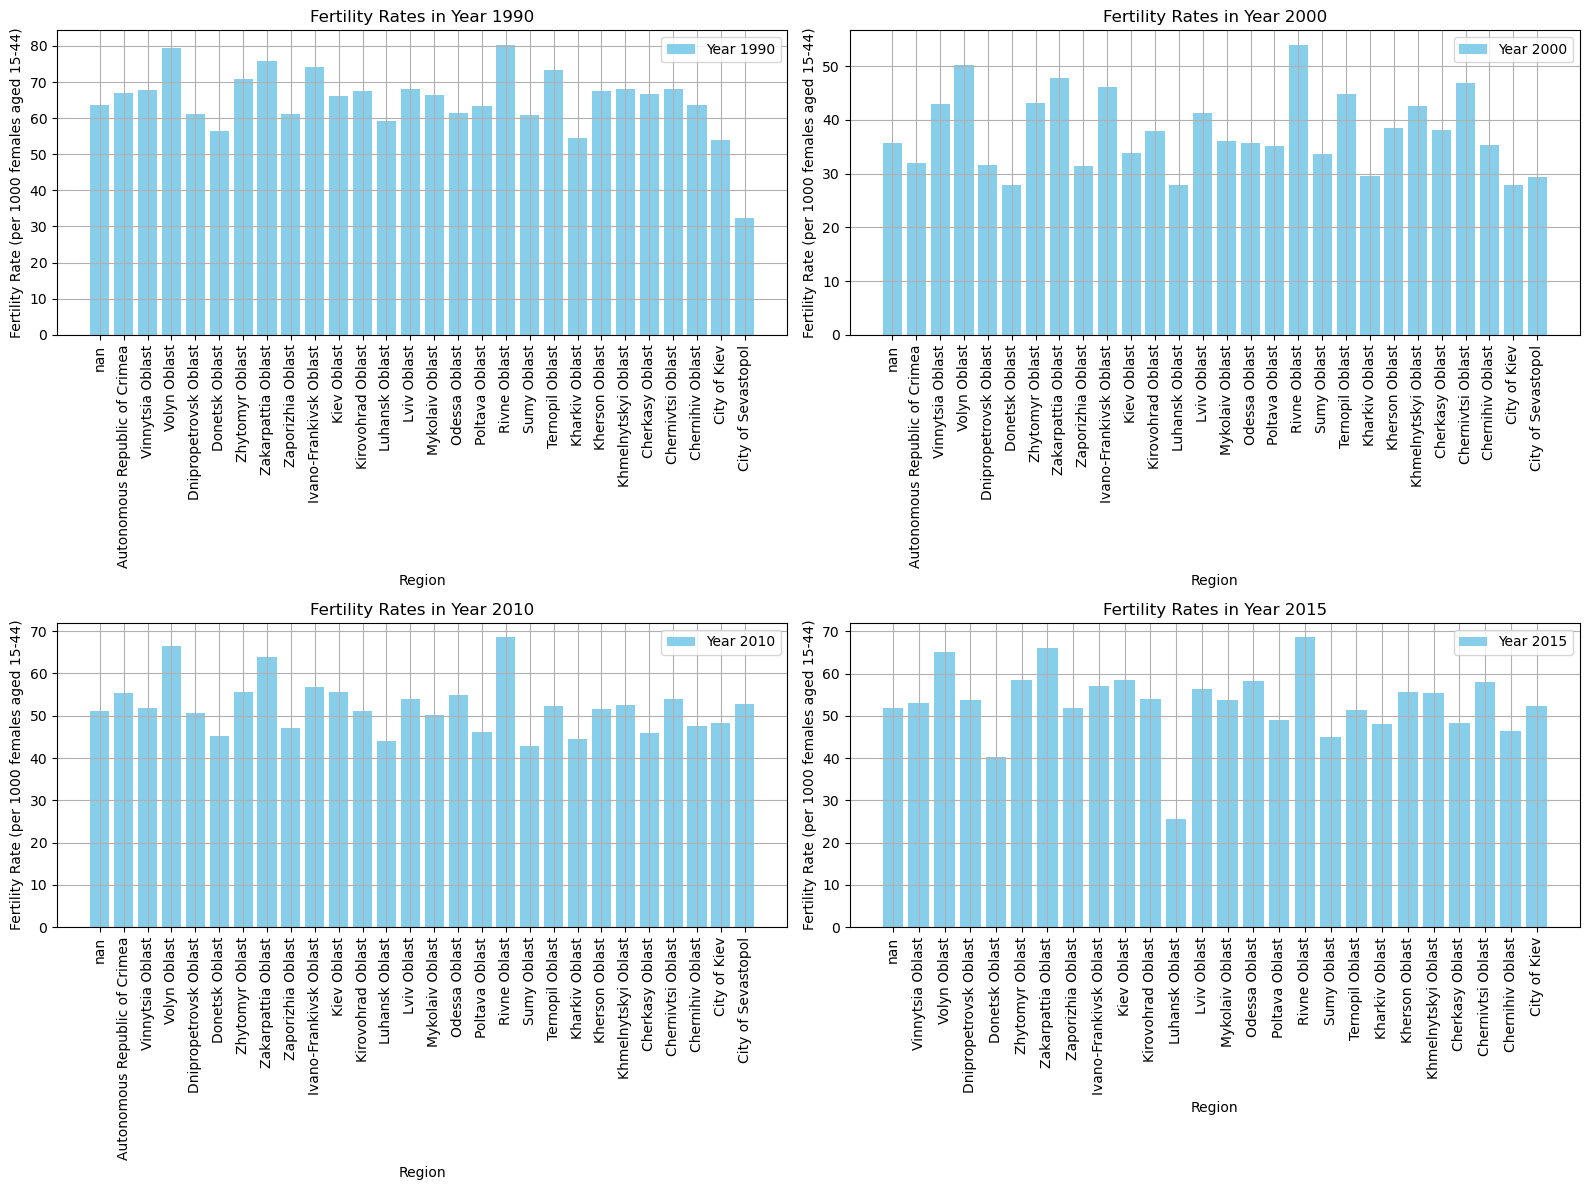

In [87]:
years_of_interest = [1990, 2000, 2010, 2015]

# Filter data for the selected years and regions
df_selected_years = data[data['year'].isin(years_of_interest)]

# Function to calculate fertility rate
def calculate_fertility_rate(df, year):
    # Filter for births
    df_births = df[(df['age'] == '0') & (df['year'] == year)]

    #print(df_births)

    total_births = df_births.groupby('region')['count'].sum().reset_index()

    #print(total_births)
    
    # Filter for females aged 15-44
    
    #df_females = df[(df['gender'] == 'f') & (df['year'] == year) & (pd.to_numeric(df['age'], errors='coerce').between(15, 44))]
    df_females = df[(df['gender'] == 1) & (df['year'] == year) & (pd.to_numeric(df['age'], errors='coerce').between(15, 44))]
    total_females = df_females.groupby('region')['count'].sum().reset_index()

    
    # Merge dataframes
    df_merged = pd.merge(total_births, total_females, on='region', suffixes=('_births', '_females'))
    
    # Calculate fertility rate
    df_merged['fertility_rate'] = (df_merged['count_births'] / df_merged['count_females']) * 1000

    print(df_merged)
    
    # Map region codes to names
    df_merged['region_name'] = df_merged['region'].map(region_codes)
    
    return df_merged[['region_name', 'fertility_rate']]

# Create a separate plot for each year
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, year in enumerate(years_of_interest):
    row = i // 2
    col = i % 2
    
    # Calculate fertility rates for the current year
    df_fertility_rates = calculate_fertility_rate(df_selected_years, year)
    
    # Ensure region_name is treated as string
    df_fertility_rates['region_name'] = df_fertility_rates['region_name'].astype(str)
    
    # Plotting
    ax = axs[row, col]
    ax.bar(df_fertility_rates['region_name'], df_fertility_rates['fertility_rate'], color='skyblue', label=f'Year {year}')
    ax.set_xlabel('Region')
    ax.set_ylabel('Fertility Rate (per 1000 females aged 15-44)')
    ax.set_title(f'Fertility Rates in Year {year}')
    ax.tick_params(axis='x', rotation=90)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

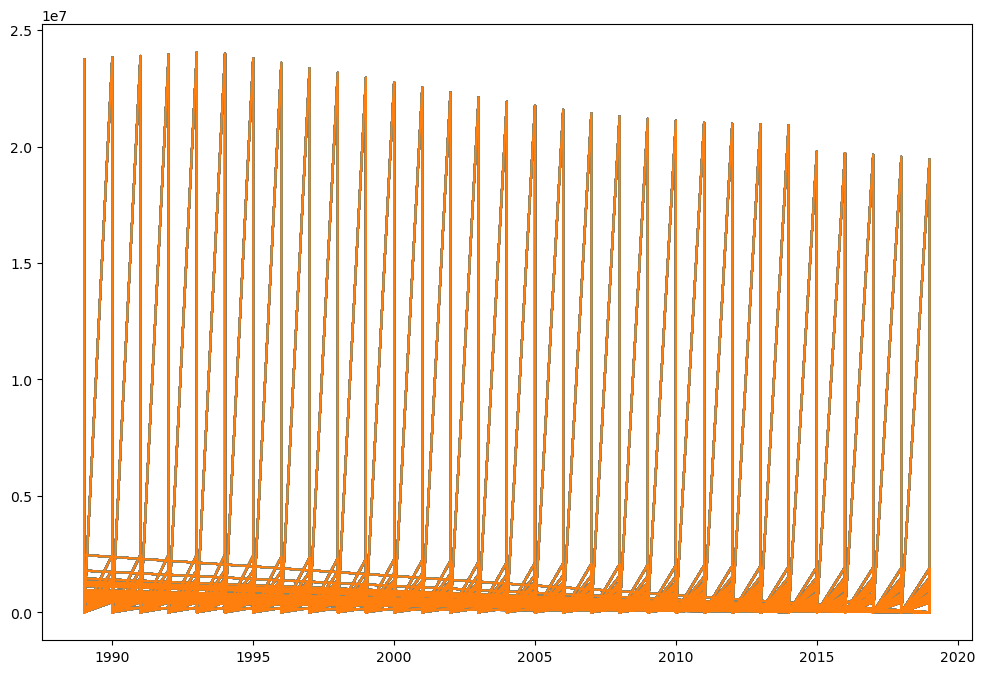

In [ ]:
# Comparing plot with gender 0 and gender 1
plt.figure(figsize=(12, 8))

#genders = total_population_ukraine['gender'].unique()
num = total_population_ukraine['count'].unique()

#      region  year  gender    age     count     name
#0          0  1989       0  total  23745108  Ukraine
#103        0  1989       1  total  27706926  Ukraine
#206        0  1990       0  total  23826196  Ukraine
#309        0  1990       1  total  27730317  Ukraine
#412        0  1991       0  total  23886551  Ukraine
#...      ...   ...     ...    ...       ...      ...
#5871       0  2017       1  total  22770325  Ukraine
#5974       0  2018       0  total  19558180  Ukraine
#6077       0  2018       1  total  22658586  Ukraine
#6180       0  2019       0  total  19455272  Ukraine
#6283       0  2019       1  total  22528292  Ukraine

#[62 rows x 6 columns]

